<a href="https://colab.research.google.com/github/Karolina-Bogacka/transbajki/blob/master/forecastking3_the_return_of_the_king.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

grouped_df = pd.read_csv('drive/MyDrive/parsed-group.csv', index_col='Unnamed: 0')

In [ ]:
grouped_df.head()

,Day,station_id,Month,Weekday,diff,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,1,448565,5,6,20.0,12.2,4.0,19.0,0.0,348.0,5.9,20.4,1020.8
1,1,448565,6,2,22.0,16.0,13.0,21.0,3.3,201.0,11.3,25.9,1013.7
2,2,448565,5,0,14.0,13.9,6.3,19.7,0.0,325.0,8.7,22.2,1017.5
3,2,448565,6,3,26.0,14.8,11.0,19.0,7.3,242.0,12.8,27.8,1018.4
4,3,448565,5,1,20.0,12.9,6.9,17.3,0.0,308.0,14.4,35.2,1014.8


In [ ]:
correlation = grouped_df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Day,station_id,Month,Weekday,diff,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
Day,1.000000,0.000080,-0.616885,-0.024051,-0.119240,-0.449876,-0.285949,-0.412630,0.164308,0.042082,0.144435,0.249438,-0.307420
station_id,0.000080,1.000000,-0.000447,-0.000204,-0.116309,0.000426,0.000556,0.000073,0.001835,-0.000583,-0.000194,-0.000048,-0.000917
Month,-0.616885,-0.000447,1.000000,0.046832,0.216712,0.636048,0.573240,0.488290,0.163355,-0.023944,0.113786,-0.067877,0.017997
Weekday,-0.024051,-0.000204,0.046832,1.000000,-0.039435,0.037222,-0.021114,0.119451,-0.169343,0.279188,0.177372,0.141491,-0.034669
diff,-0.119240,-0.116309,0.216712,-0.039435,1.000000,0.286909,0.055074,0.289288,-0.098012,-0.024659,0.009226,0.028596,0.125681
tavg,-0.449876,0.000426,0.636048,0.037222,0.286909,1.000000,0.514969,0.922945,-0.096024,-0.056463,0.119588,0.102034,0.030052
tmin,-0.285949,0.000556,0.573240,-0.021114,0.055074,0.514969,1.000000,0.236544,0.213386,-0.130848,0.500004,0.351939,-0.443672
tmax,-0.412630,0.000073,0.488290,0.119451,0.289288,0.922945,0.236544,1.000000,-0.215161,-0.030868,0.027907,0.088998,0.184592
prcp,0.164308,0.001835,0.163355,-0.169343,-0.098012,-0.096024,0.213386,-0.215161,1.000000,0.114219,0.095170,0.169710,-0.318628
wdir,0.042082,-0.000583,-0.023944,0.279188,-0.024659,-0.056463,-0.130848,-0.030868,0.114219,1.000000,0.014078,0.137597,-0.183513


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
y = grouped_df.pop('diff')

In [ ]:
weather_df = grouped_df.drop(['Day', 'station_id', 'Month', 'Weekday'], axis=1)

In [ ]:
weather_df.head()

,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,12.2,4.0,19.0,0.0,348.0,5.9,20.4,1020.8
1,16.0,13.0,21.0,3.3,201.0,11.3,25.9,1013.7
2,13.9,6.3,19.7,0.0,325.0,8.7,22.2,1017.5
3,14.8,11.0,19.0,7.3,242.0,12.8,27.8,1018.4
4,12.9,6.9,17.3,0.0,308.0,14.4,35.2,1014.8


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(grouped_df), columns=grouped_df.columns)
df_scaled

,Day,station_id,Month,Weekday,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,-1.578184,-0.524922,0.141128,1.500328,-0.625013,-1.360907,-0.003474,-0.353204,1.271500,-1.397038,-0.797852,0.663624
1,-1.578184,-0.524922,2.114496,-0.499791,0.963427,1.915860,0.581407,0.646246,-0.259820,-0.283672,-0.358222,-0.576056
2,-1.476684,-0.524922,0.141128,-1.499851,0.085605,-0.523511,0.201234,-0.353204,1.031906,-0.819737,-0.653973,0.087435
3,-1.476684,-0.524922,2.114496,0.000239,0.461814,1.187690,-0.003474,1.857701,0.167283,0.025596,-0.206349,0.244577
4,-1.375184,-0.524922,0.141128,-0.999821,-0.332406,-0.305060,-0.500623,-0.353204,0.854815,0.355482,0.385154,-0.383993
...,...,...,...,...,...,...,...,...,...,...,...,...
14649,1.263821,8.093318,-1.832240,0.500269,-1.126626,-1.615767,-0.559112,-0.353204,-1.197363,-1.273331,-0.797852,1.554099
14650,1.263821,8.093318,0.141128,1.500328,-0.499610,0.459519,-0.588356,-0.232058,0.115197,-0.263055,0.233281,-0.977643
14651,1.365321,8.093318,-1.832240,1.000299,-1.001223,-1.724993,-0.500623,-0.353204,0.886066,-1.129006,-0.653973,1.152512
14652,1.365321,8.093318,0.141128,-1.499851,-1.043024,-0.268651,-1.758118,5.280060,0.844397,-0.654794,-0.206349,-1.064944


In [ ]:
df_scaled.head()

,Day,station_id,Month,Weekday,tavg,tmin,tmax,prcp,wdir,wspd,wpgt,pres
0,-1.578184,-0.524922,0.141128,1.500328,-0.625013,-1.360907,-0.003474,-0.353204,1.271500,-1.397038,-0.797852,0.663624
1,-1.578184,-0.524922,2.114496,-0.499791,0.963427,1.915860,0.581407,0.646246,-0.259820,-0.283672,-0.358222,-0.576056
2,-1.476684,-0.524922,0.141128,-1.499851,0.085605,-0.523511,0.201234,-0.353204,1.031906,-0.819737,-0.653973,0.087435
3,-1.476684,-0.524922,2.114496,0.000239,0.461814,1.187690,-0.003474,1.857701,0.167283,0.025596,-0.206349,0.244577
4,-1.375184,-0.524922,0.141128,-0.999821,-0.332406,-0.305060,-0.500623,-0.353204,0.854815,0.355482,0.385154,-0.383993


In [ ]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA(n_components=12)
principalComponents = pca.fit_transform(df_scaled)

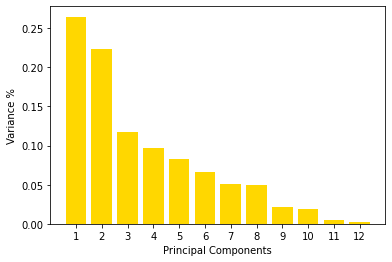

In [ ]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
PCA_components

,0,1,2,3,4,5,6,7
0,-2.162107,0.113269,-1.455665,-0.345717,-0.059093,0.081782,-0.225605,0.160543
1,1.254635,-0.951659,0.108701,1.656703,-0.627151,-0.490384,-0.250015,0.173126
2,-0.964716,-0.292439,-1.171946,-0.064815,-0.470662,0.041678,-0.039913,-0.007585
3,0.812958,0.040398,-0.317677,1.793933,0.743275,-0.795194,0.194643,0.040683
4,0.179344,0.815934,-0.572065,-0.751365,-0.329589,-0.052477,0.031498,-0.172354
...,...,...,...,...,...,...,...,...
14649,-2.916316,0.121355,1.021614,-0.267284,0.825824,0.230852,-0.226592,0.052951
14650,0.297829,0.847571,0.107780,0.104290,-0.892724,0.056824,-0.567983,0.033067
14651,-2.523120,0.538311,-0.924059,-0.690841,0.414249,-0.065661,-0.076868,0.016526
14652,0.187011,3.605268,-1.452235,3.876552,2.004962,0.391568,0.200355,-0.256166


NameError: ignored

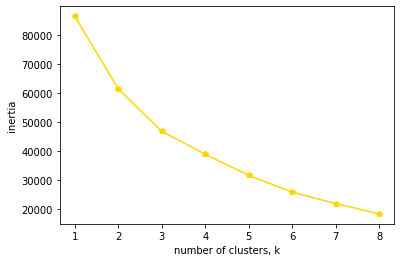

In [ ]:
from sklearn.cluster import KMeans

inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,9):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,9), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()